# <b> Customer Segmentation Analysis

In [2]:
"""
Importing necessary libraries for data manipulation, preprocessing, clustering, dimensionality reduction, visualization, and machine learning models.
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import plotly.express as px



## <b>Loading the Dataset

In [3]:
"""Reading the Walmart dataset into a Pandas DataFrame named data."""

data = pd.read_csv('Dataset/walmart.csv')

## <b>Data Preprocessing

In [4]:
""" Mapping categorical variables (Gender, Age, City_Category, Stay_In_Current_City_Years) to numerical values for analysis."""

data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})
age_map = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
data['Age'] = data['Age'].map(age_map)
city_map = {'A': 0, 'B': 1, 'C': 2}
data['City_Category'] = data['City_Category'].map(city_map)
stay_map = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(stay_map)

## <b>Selecting Features for Clustering

In [5]:
"""Defining a list of features (features) for clustering and analysis."""

features = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']

## <b>Standardizing the data

In [6]:
""" Standardizing the selected features to have a mean of 0 and a variance of 1 using StandardScaler."""

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

## <b>Elbow Method

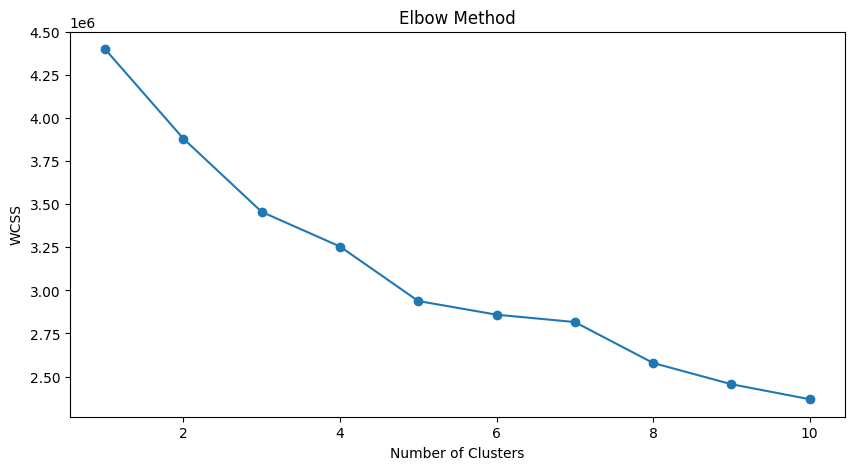

In [7]:
"""
Computing the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters using K-Means.
Plotting the WCSS to identify the optimal number of clusters based on the "elbow" point where the curve bends.
"""

# Determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## <b>Applying K-Means Clustering

In [8]:
"""
Applying K-Means clustering with the identified optimal number of clusters (optimal_clusters).
Assigns cluster labels (Cluster) to the data based on K-Means results.
"""

# Assuming the optimal number of clusters from the elbow method is 4

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

## <b>Analyzing the clusters

In [9]:
# Cluster Size
cluster_sizes = data['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Sizes:
 Cluster
2    170682
1    146363
0    134318
3     98705
Name: count, dtype: int64


## <b>Silhouette Scoring

In [10]:
# Determine the size of the sample (e.g., 10% of the data)
sample_size = int(0.1 * data_scaled.shape[0])

# Create a random sample of the data
random_indices = np.random.choice(data_scaled.shape[0], sample_size, replace=False)
data_sample = data_scaled[random_indices]
cluster_sample = data['Cluster'].iloc[random_indices]

# Calculate the silhouette score on the sample
silhouette_avg = silhouette_score(data_sample, cluster_sample)
print(f"Silhouette Score (sampled): {silhouette_avg}")

Silhouette Score (sampled): 0.11346116644341267


## <b>Clustering Centers

In [11]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
cluster_centers['Cluster'] = range(optimal_clusters)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
      Gender       Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0  0.842576  2.381277    7.800700       1.136393                    1.865260   
1  0.611329  1.935651    3.460818       0.883438                    1.852108   
2  0.722928  3.132140    8.178629       1.067400                    1.824793   
3  0.893243  2.384708   15.099476       1.107910                    1.916481   

   Marital_Status  Product_Category      Purchase  Cluster  
0        0.400372          1.928591  15845.711171        0  
1        0.005575          6.523114   6903.209313        1  
2        0.994855          6.632507   7191.591737        2  
3        0.009637          6.351701   7390.217610        3  


## <b> Davies-Bouldin Score

In [12]:
davies_bouldin = davies_bouldin_score(data_scaled, data['Cluster'])
print(f"Davies-Bouldin Score: {davies_bouldin}")

Davies-Bouldin Score: 2.1273773493355113


## <b> PCA for Visualization

In [13]:
# Reducing the dimensionality of the data using Principal Component Analysis (PCA) to 2 components (PCA1 and PCA2).

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

## <b> Visualizing Clusters using PCA

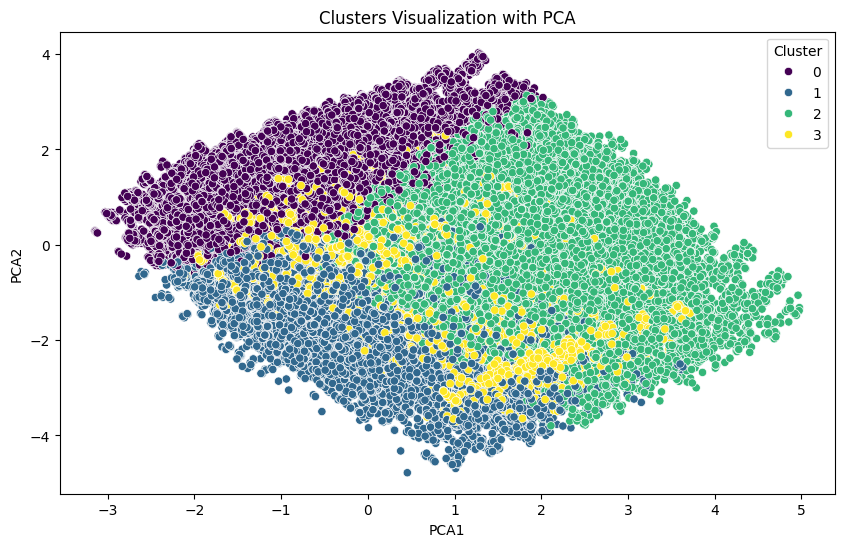

In [14]:
# Visualizing clusters in a 2D space using a scatter plot colored by cluster labels.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters Visualization with PCA')
plt.show()

## <b> t-SNE for Visualization

In [15]:
# Define the sample size (e.g., 10% of the data)
sample_size = 0.1

# Create a random sample of the data
data_sampled = data.sample(frac=sample_size, random_state=42)

# Standardize the sampled data
data_sampled_scaled = scaler.transform(data_sampled[features])

# Apply t-SNE on the sampled data
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_sampled_scaled)

# Store t-SNE results in the sampled DataFrame
data_sampled['TSNE1'] = data_tsne[:, 0]
data_sampled['TSNE2'] = data_tsne[:, 1]

## <b> Visualize Clusters using t-SNE

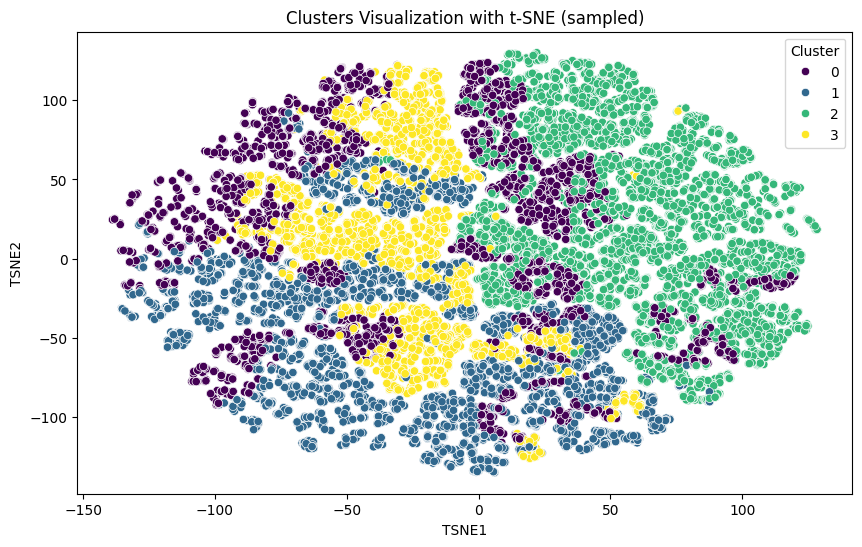

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=data_sampled, palette='viridis')
plt.title('Clusters Visualization with t-SNE (sampled)')
plt.show()

## <b> Detailed Cluster Analyzing

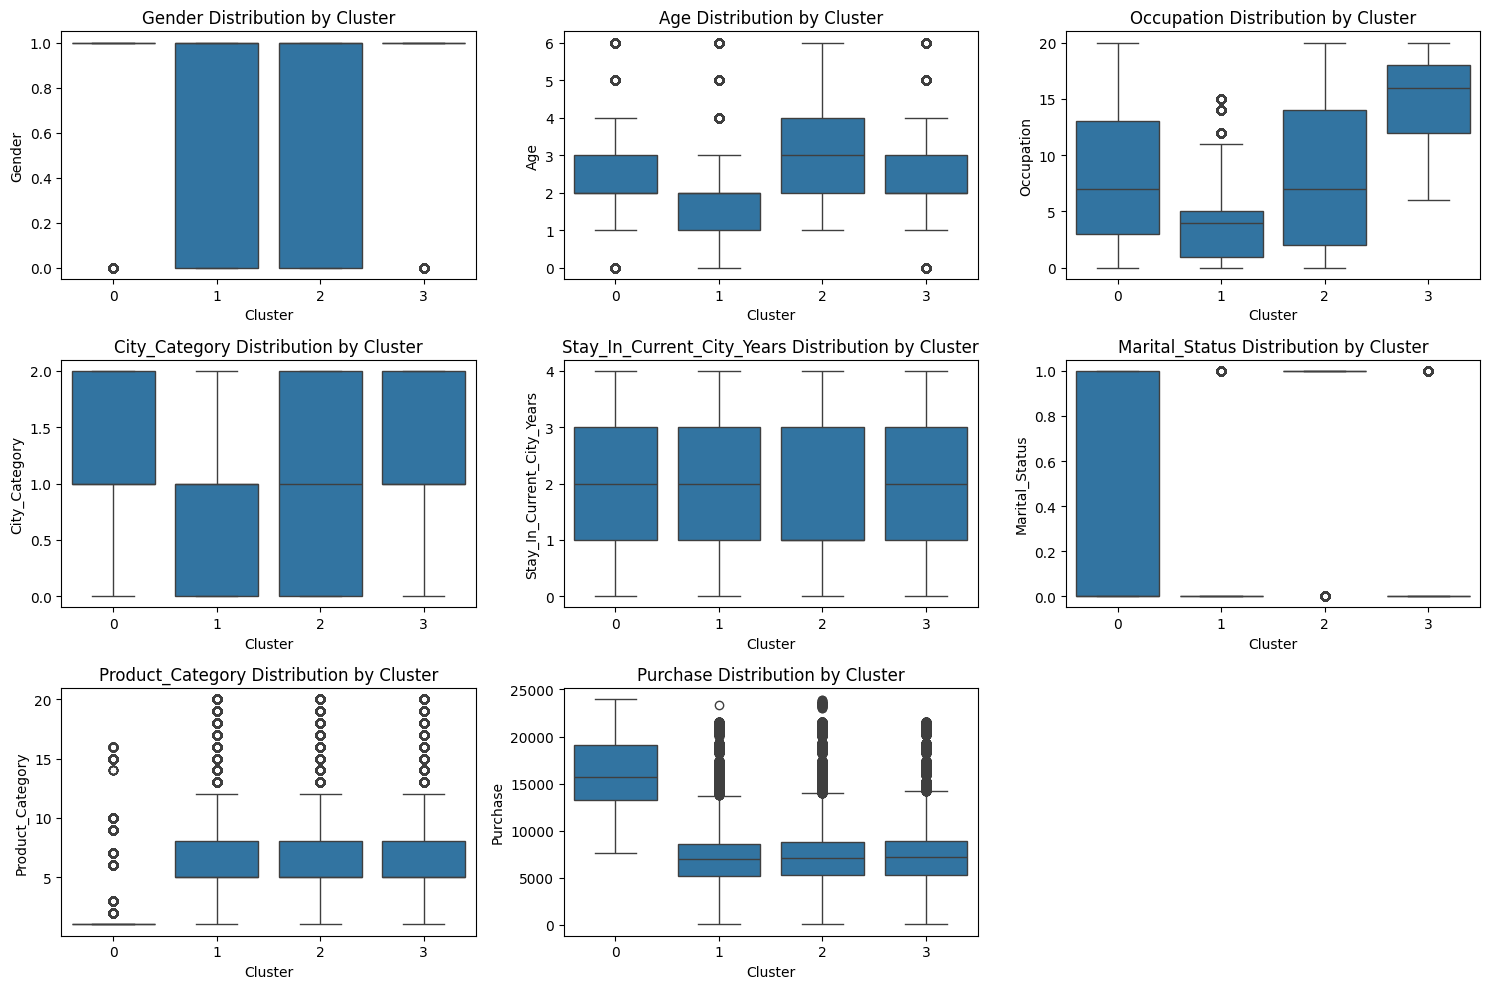

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'{feature} Distribution by Cluster')
plt.tight_layout()
plt.show()

## <b>Cluster Profiling

In [18]:
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster} Profile:")
    cluster_profile = data[data['Cluster'] == cluster][features].mean()
    print(cluster_profile)
    print("\n")

Cluster 0 Profile:
Gender                            0.842352
Age                               2.381498
Occupation                        7.797481
City_Category                     1.136423
Stay_In_Current_City_Years        1.865491
Marital_Status                    0.400557
Product_Category                  1.928267
Purchase                      15846.423212
dtype: float64


Cluster 1 Profile:
Gender                           0.612054
Age                              1.937491
Occupation                       3.466546
City_Category                    0.884329
Stay_In_Current_City_Years       1.854143
Marital_Status                   0.005418
Product_Category                 6.526615
Purchase                      6900.711122
dtype: float64


Cluster 2 Profile:
Gender                           0.722865
Age                              3.132064
Occupation                       8.177459
City_Category                    1.067400
Stay_In_Current_City_Years       1.824516
Marital_Status     

## <b> Feature Importance

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data_scaled, data['Cluster'])
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Marital_Status                0.329940
Purchase                      0.263821
Occupation                    0.199190
Product_Category              0.115035
Age                           0.044546
Gender                        0.025439
City_Category                 0.014883
Stay_In_Current_City_Years    0.007146
dtype: float64


## <b> Visualize Feature Importance

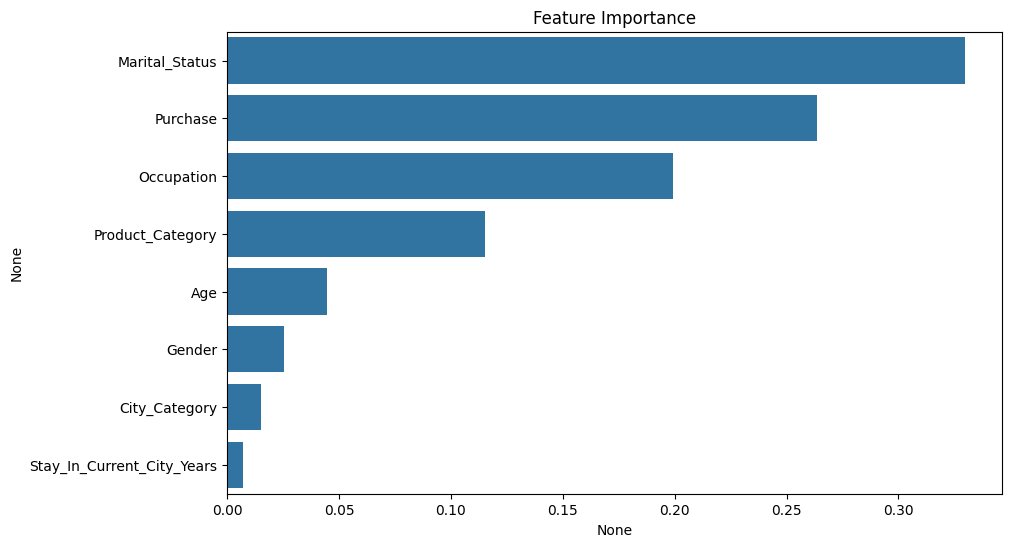

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

## <b> Correlation Analysis

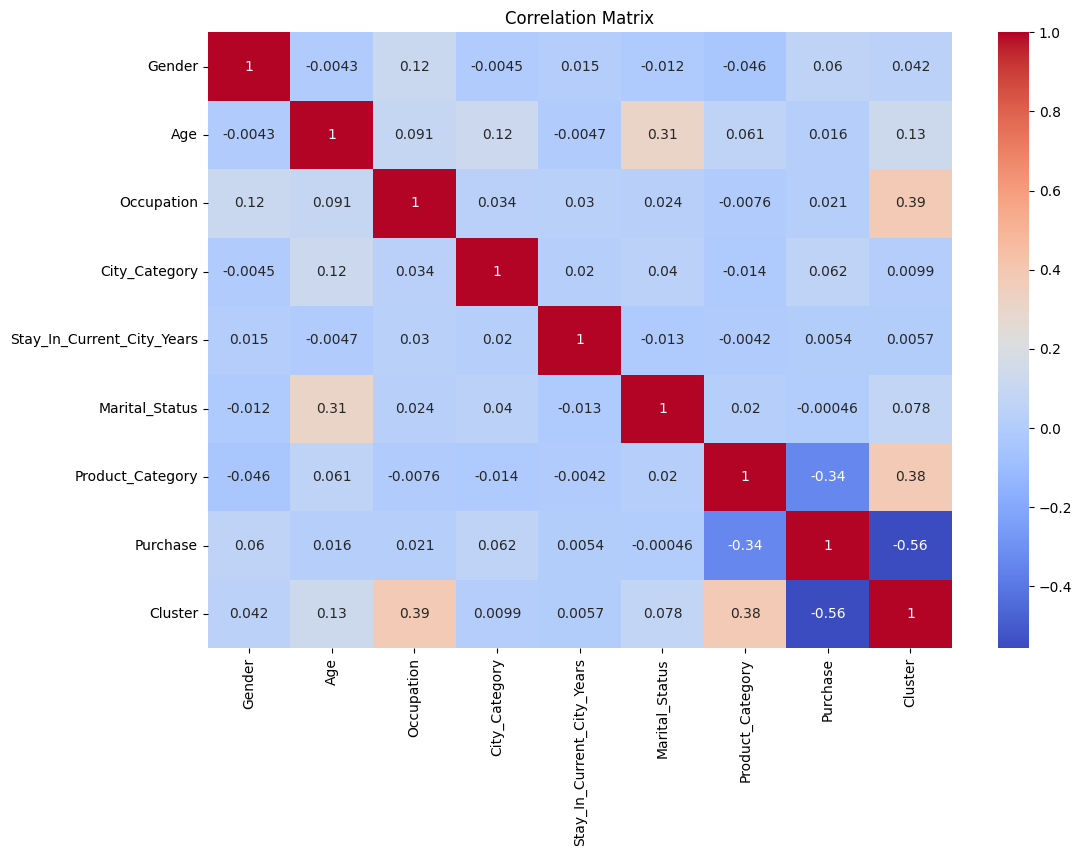

In [21]:
correlation_matrix = data[features + ['Cluster']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## <b>Model Comparison

### <b>Agglomerative Clustering

In [22]:
"""
Applying MiniBatchKMeans clustering on the sampled data and assigns cluster labels (MiniBatchKMeans_Cluster).
Applying DBSCAN clustering on the sampled data with specified parameters (epsilon=1.5, min_samples=5) and assigns cluster labels (DBSCAN_Cluster).
"""


# Defining the sample size (e.g., 10% of the data)
sample_size = 0.1

# Creating a random sample of the data
data_sampled = data.sample(frac=sample_size, random_state=42)

# Standardizing the sampled data
data_sampled_scaled = scaler.transform(data_sampled[features])

# Performing MiniBatchKMeans Clustering on the sampled data
optimal_clusters = 5  # Assuming optimal clusters is already defined
mini_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
data_sampled['MiniBatchKMeans_Cluster'] = mini_kmeans.fit_predict(data_sampled_scaled)

# Calculating evaluation metrics on the sampled data
mini_kmeans_silhouette = silhouette_score(data_sampled_scaled, data_sampled['MiniBatchKMeans_Cluster'])
mini_kmeans_db_score = davies_bouldin_score(data_sampled_scaled, data_sampled['MiniBatchKMeans_Cluster'])

print(f"MiniBatchKMeans Clustering Silhouette Score (sampled): {mini_kmeans_silhouette}")
print(f"MiniBatchKMeans Clustering Davies-Bouldin Score (sampled): {mini_kmeans_db_score}")

MiniBatchKMeans Clustering Silhouette Score (sampled): 0.10433566586679507
MiniBatchKMeans Clustering Davies-Bouldin Score (sampled): 2.218089475238354


### <b>DBSCAN

In [23]:
"""
Computing silhouette score and Davies-Bouldin score for MiniBatchKMeans and DBSCAN on the sampled data to evaluate clustering performance.
"""

# Defining the sample size (e.g., 10% of the data)
sample_size = 0.1

# Creating a random sample of the data
data_sampled = data.sample(frac=sample_size, random_state=42)

# Standardizing the sampled data
data_sampled_scaled = scaler.transform(data_sampled[features])

# Performing DBSCAN on the sampled data
dbscan = DBSCAN(eps=1.5, min_samples=5, n_jobs=-1)  # Use n_jobs=-1 to utilize all available CPU cores
data_sampled['DBSCAN_Cluster'] = dbscan.fit_predict(data_sampled_scaled)

# DBSCAN can have noise points with cluster label -1
mask = data_sampled['DBSCAN_Cluster'] != -1
dbscan_silhouette = silhouette_score(data_sampled_scaled[mask], data_sampled['DBSCAN_Cluster'][mask])
dbscan_db_score = davies_bouldin_score(data_sampled_scaled[mask], data_sampled['DBSCAN_Cluster'][mask])

print(f"DBSCAN Silhouette Score (sampled): {dbscan_silhouette}")
print(f"DBSCAN Davies-Bouldin Score (sampled): {dbscan_db_score}")

DBSCAN Silhouette Score (sampled): 0.16560168906547953
DBSCAN Davies-Bouldin Score (sampled): 2.178528543458108


## <b>Predictive Modeling

In [24]:
# Splits the data into training and testing sets.
# Trains a Logistic Regression model (logreg) on the training data (X_train, y_train).

X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Cluster'], test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## <b>Classification Report

In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     40297
           1       0.99      0.99      0.99     44150
           2       0.99      0.99      0.99     50925
           3       0.98      0.98      0.98     29649

    accuracy                           0.99    165021
   macro avg       0.99      0.99      0.99    165021
weighted avg       0.99      0.99      0.99    165021



## <b> Confusion Matrix

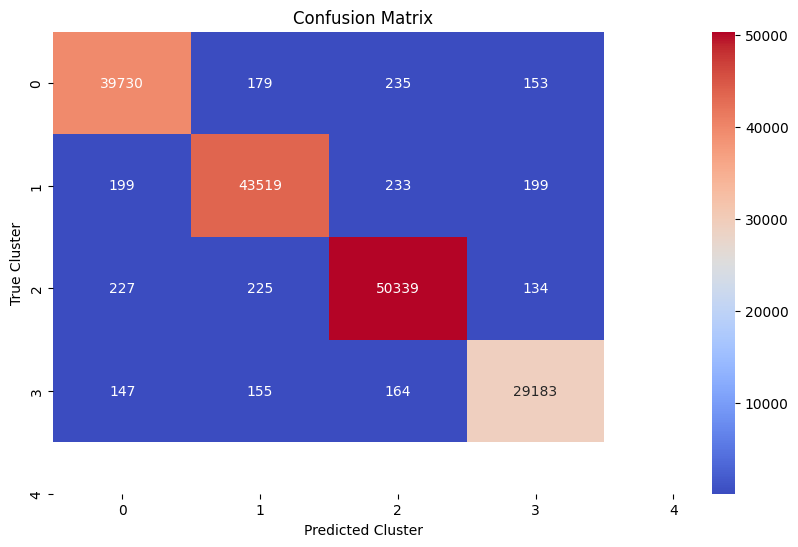

In [26]:
# Predicting cluster labels (y_pred) for the test data (X_test).
# Evaluating model performance using a classification report that includes precision, recall, F1-score, and support.


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(optimal_clusters), yticklabels=range(optimal_clusters))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')
plt.show()

## <b>Saving the Cluster Result

In [29]:
# Saves the analyzed data with cluster labels (Cluster) to a CSV file named customer_segments.csv for further analysis or reporting.
data.to_csv('customer_segments.csv', index=False)